#Varioius CNN Architecture on MNIST Data using Keras

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


#Intialization of variables

In [0]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

#loading ,Normalization and one hot encoding of data

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# New Section

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#3 layer CNN

#Input layer + 2conv layers + max pool + Drop out + conv layers + max pool +  Drop out + Flatten + Dense + Flatten + Drop out + Dense Layer

In [7]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(rate=0.25))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(rate=0.25))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(rate=0.5))
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         


In [8]:
model3.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history = model3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 17s 287us/step - loss: 0.2978 - acc: 0.9060 - val_loss: 0.0503 - val_acc: 0.9838
Epoch 2/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0938 - acc: 0.9714 - val_loss: 0.0351 - val_acc: 0.9886
Epoch 3/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0717 - acc: 0.9789 - val_loss: 0.0266 - val_acc: 0.9912
Epoch 4/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0606 - acc: 0.9821 - val_loss: 0.0249 - val_acc: 0.9916
Epoch 5/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0517 - acc: 0.9846 - val_loss: 0.0217 - val_acc: 0.9926
Epoch 6/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0480 - acc: 0.9857 - val_loss: 0.0226 - val_acc: 0.9927
Epoch 7/10
6

In [9]:
score3 = model3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score3[0]) 
print('Test accuracy:', score3[1])

Test score: 0.019043457312680402
Test accuracy: 0.9932


Text(0, 0.5, 'loss')

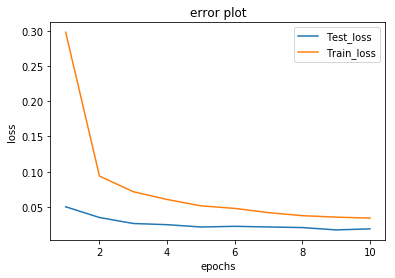

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
test_los,=plt.plot(x,vy,label="Test_loss")
train_los,=plt.plot(x,ty,label="Train_loss")
plt.legend(handles=[test_los,train_los])
plt.title("error plot")
plt.xlabel("epochs")
plt.ylabel("loss")

#5 layer CNN

#Input layer + 2conv layers + max pool + Drop out + conv layers + max pool +  Drop out + 2conv layers + max pool + Drop out + Flatten + Dense + Flatten + Drop out+ Dense layer

In [11]:

model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

model5.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(rate=0.25))

model5.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(rate=0.25))

model5.add(Conv2D(256, (5, 5), activation='relu',padding='same'))
model5.add(Conv2D(256, (5, 5), activation='relu',padding='same'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(rate=0.5))

model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(rate=0.5))
model5.add(Dense(num_classes, activation='softmax'))
model5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 128)       204928    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 128)        

In [12]:
model5.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history=model5.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 36s 596us/step - loss: 0.3313 - acc: 0.8918 - val_loss: 0.0408 - val_acc: 0.9878
Epoch 2/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.0610 - acc: 0.9831 - val_loss: 0.0290 - val_acc: 0.9923
Epoch 3/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.0420 - acc: 0.9884 - val_loss: 0.0221 - val_acc: 0.9934
Epoch 4/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.0318 - acc: 0.9915 - val_loss: 0.0226 - val_acc: 0.9929
Epoch 5/10
60000/60000 [==============================] - 33s 557us/step - loss: 0.0253 - acc: 0.9930 - val_loss: 0.0254 - val_acc: 0.9929
Epoch 6/10
60000/60000 [==============================] - 33s 555us/step - loss: 0.0211 - acc: 0.9942 - val_loss: 0.0178 - val_acc: 0.9949
Epoch 7/10
60000/60000 [==============================] - 33s 554us/step - loss: 0.0174 - acc: 0.9953 - val_loss: 0.

In [13]:
score5 = model5.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score5[0]) 
print('Test accuracy:', score5[1])

Test score: 0.01785606231603083
Test accuracy: 0.9959


Text(0, 0.5, 'loss')

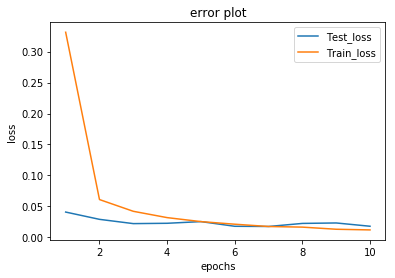

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
test_los,=plt.plot(x,vy,label="Test_loss")
train_los,=plt.plot(x,ty,label="Train_loss")
plt.legend(handles=[test_los,train_los])
plt.title("error plot")
plt.xlabel("epochs")
plt.ylabel("loss")

#7 layer CNN

#Input layer + 2conv layers + max pool + Drop out + 2conv layers + max pool + Drop out + conv layers + max pool + Drop out + 2conv layers + max pool + Drop out + Flatten + Dense + Flatten + Drop out+ Dense layer


In [15]:
model7 = Sequential()
model7.add(Conv2D(32, kernel_size=(2, 2),activation='relu',input_shape=input_shape))

model7.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(rate=0.25))

model7.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
model7.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(rate=0.5))

model7.add(Conv2D(256, (5, 5), activation='relu',padding='same'))
model7.add(Conv2D(256, (5, 5), activation='relu',padding='same'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(rate=0.5))

model7.add(Conv2D(512, (5, 5), activation='relu',padding='same'))
model7.add(Conv2D(512, (5, 5), activation='relu',padding='same'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(rate=0.5))

model7.add(Flatten())
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(rate=0.5))
model7.add(Dense(num_classes, activation='softmax'))
model7.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 27, 27, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 128)       204928    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 128)       409728    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 128)        

In [16]:
model7.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

model7.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 79s 1ms/step - loss: 1.1005 - acc: 0.6182 - val_loss: 0.2217 - val_acc: 0.9382
Epoch 2/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1106 - acc: 0.9731 - val_loss: 0.1254 - val_acc: 0.9709
Epoch 3/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0658 - acc: 0.9843 - val_loss: 0.0367 - val_acc: 0.9906
Epoch 4/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0493 - acc: 0.9884 - val_loss: 0.0294 - val_acc: 0.9917
Epoch 5/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0411 - acc: 0.9901 - val_loss: 0.0284 - val_acc: 0.9928
Epoch 6/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0365 - acc: 0.9915 - val_loss: 0.0278 - val_acc: 0.9930
Epoch 7/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0307 - acc: 0.9923 - val_loss: 0.0299 - val_acc

In [17]:
score7 = model7.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score7[0]) 
print('Test accuracy:', score7[1])

Test score: 0.029218063128428094
Test accuracy: 0.9931


Text(0, 0.5, 'loss')

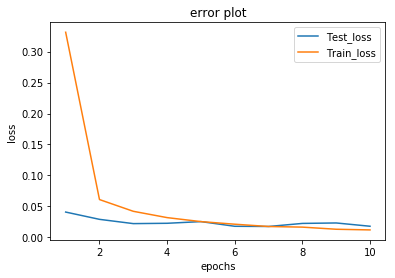

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
test_los,=plt.plot(x,vy,label="Test_loss")
train_los,=plt.plot(x,ty,label="Train_loss")
plt.legend(handles=[test_los,train_los])
plt.title("error plot")
plt.xlabel("epochs")
plt.ylabel("loss")

#pretty table to compare 3 models

In [20]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["MLP","Test_score","Test_accuracy"]
x.add_row(["3 LAYER",score3[0],score3[1]])
x.add_row(["5 LAYER",score5[0],score5[1]])
x.add_row(["7 LAYER",score7[0],score7[1]])
print(x)

+---------+----------------------+---------------+
|   MLP   |      Test_score      | Test_accuracy |
+---------+----------------------+---------------+
| 3 LAYER | 0.019043457312680402 |     0.9932    |
| 5 LAYER | 0.01785606231603083  |     0.9959    |
| 7 LAYER | 0.029218063128428094 |     0.9931    |
+---------+----------------------+---------------+


#steps followed in presenting data

1.MNIST data set is loaded and divide in to train and test data sets.
<br>
2.3 different CNN architectures are applied on MNIST data to identy the digits.
<br>
3.since it is a multi classification problem softmax activation is used at the output layer.
<br>
4.Error plots are plotted for both tain and test loss.
<br>
5.Results obtained are represented using pretty table.